In [1]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

In [2]:
!pip install ucimlrepo


from ucimlrepo import fetch_ucirepo 
from sklearn.model_selection import train_test_split
import sys
import os
import pandas as pd



Defaulting to user installation because normal site-packages is not writeable


In [3]:
# Caminho absoluto para a pasta src
src_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'src'))
src_path_2 = os.path.abspath(os.path.join(os.getcwd(), '..', 'src/modelos'))
sys.path.append(src_path)
sys.path.append(src_path_2)

from model_wizard import buscar_melhor_wisard
from model_mlp import busca_melhores_mlp
from tratamento_dados import preprocess_data,preprocess_data_standart_scale
from metricas import plot_confusion_matrix, classification_metrics

# Primeiro Dataset

## Wizard

In [4]:
# fetch dataset 
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition = fetch_ucirepo(id=544) 
  
# data (as pandas dataframes) 
X = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.features 
y = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.targets 
  
# metadata 
print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.metadata) 
  
# variable information 
print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.variables)

print(y)

{'uci_id': 544, 'name': 'Estimation of Obesity Levels Based On Eating Habits and Physical Condition ', 'repository_url': 'https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition', 'data_url': 'https://archive.ics.uci.edu/static/public/544/data.csv', 'abstract': 'This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. ', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 2111, 'num_features': 16, 'feature_types': ['Integer'], 'demographics': ['Gender', 'Age'], 'target_col': ['NObeyesdad'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Tue Sep 10 2024', 'dataset_doi': '10.24432/C5H31Z', 'creators': [], 'intro_paper': {'ID': 358, 'type': 

### Visualização de datasets

In [5]:
print("Features:")
print(X.head())
print("\nTargets:")
print(y)

# Identificar colunas categóricas e numéricas
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(include=['number']).columns.tolist()

print("\nColunas categóricas:", categorical_cols)
print("Colunas numéricas:", numeric_cols)

Features:
   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS  
0  Public_Transportation  
1  Public_Transportation  
2  Public_Transportation  
3                Walking  
4  Public_Transportation  

Tar

### Tratamento de Dados

In [6]:
X_processed, y_encoded, le = preprocess_data(X, y, categorical_cols, numeric_cols)
# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)
# Exibe as dimensões dos conjuntos de treino e teste
print("Tamanho do conjunto de treino:", X_train.shape)
print("Tamanho do conjunto de teste:", X_test.shape)
print("Tamanho dos rótulos de treino:", y_train.shape)
print("Tamanho dos rótulos de teste:", y_test.shape)

print("\nExemplo de X_train (primeiras 5 linhas):")
print(X_train[:5])  # Exibe as 5 primeiras linhas de X_train

print("\nExemplo de y_train (primeiros 5 rótulos):")
print(y_train[:5])  # Exibe os 5 primeiros rótulos de y_train

print("\nExemplo de X_test (primeiras 5 linhas):")
print(X_test[:5])  # Exibe as 5 primeiras linhas de X_test

print("\nExemplo de y_test (primeiros 5 rótulos):")
print(y_test[:5])  # Exibe os 5 primeiros rótulos de y_test

Tamanho do conjunto de treino: (1477, 87)
Tamanho do conjunto de teste: (634, 87)
Tamanho dos rótulos de treino: (1477,)
Tamanho dos rótulos de teste: (634,)

Exemplo de X_train (primeiras 5 linhas):
[[1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1
  1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0
  0 0 1 0 1 0 0 0 0 1 0 0 0 1 0]
 [1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 0 0
  0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1
  0 0 1 0 1 0 0 0 0 1 0 0 0 1 0]
 [1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0
  0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0
  1 0 1 0 1 0 0 0 1 0 0 0 0 1 0]
 [1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1
  1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0
  1 0 1 0 0 1 0 1 0 0 0 0 0 1 0]
 [1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0
  

#### Métricas

In [7]:
best_model, best_params, best_score, random_search = buscar_melhor_wisard(X_train, y_train)

print("Melhores parâmetros encontrados:", best_params)
print("Melhor acurácia:", best_score)

# Faz predição codificada
y_train_pred_encoded = random_search.predict(X_train)

# Imprime relatório de classificação com rótulos originais
classification_metrics(y_train, y_train_pred_encoded, le)

Melhores parâmetros encontrados: {'wisard__tuple_size': 11, 'wisard__bleaching': True}
Melhor acurácia: 0.660786237679821
                     precision    recall  f1-score   support

Insufficient_Weight       0.84      1.00      0.91       190
      Normal_Weight       0.59      0.87      0.70       201
     Obesity_Type_I       0.53      0.89      0.67       245
    Obesity_Type_II       0.94      0.66      0.77       208
   Obesity_Type_III       1.00      0.69      0.82       227
 Overweight_Level_I       0.80      0.61      0.69       203
Overweight_Level_II       1.00      0.43      0.60       203

           accuracy                           0.74      1477
          macro avg       0.81      0.74      0.74      1477
       weighted avg       0.81      0.74      0.74      1477



### Predição

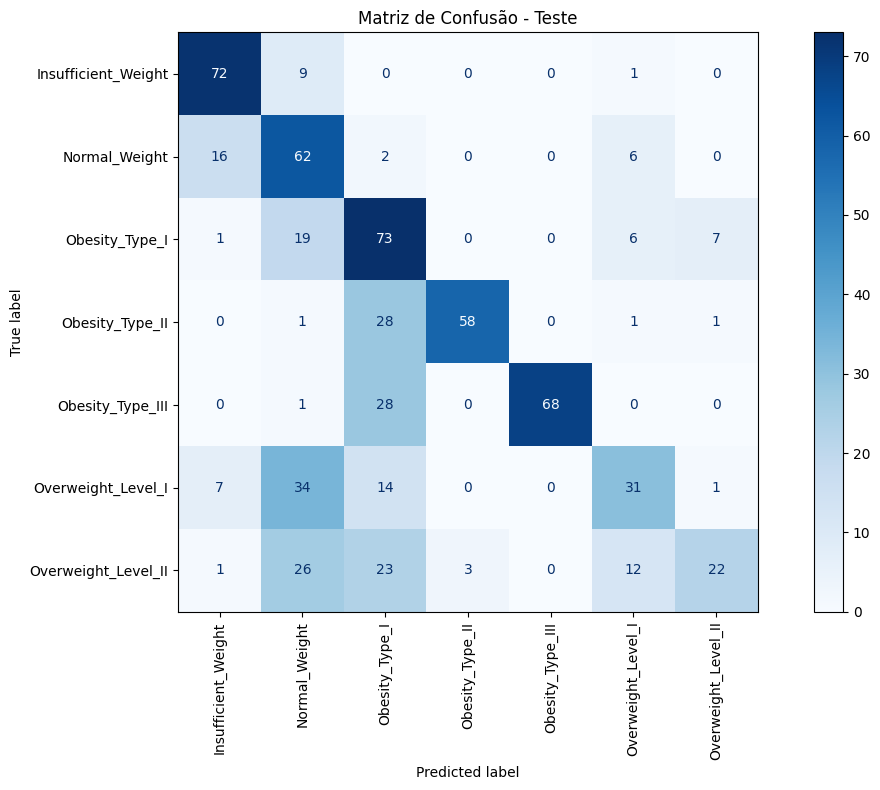

                     precision    recall  f1-score   support

Insufficient_Weight       0.74      0.88      0.80        82
      Normal_Weight       0.41      0.72      0.52        86
     Obesity_Type_I       0.43      0.69      0.53       106
    Obesity_Type_II       0.95      0.65      0.77        89
   Obesity_Type_III       1.00      0.70      0.82        97
 Overweight_Level_I       0.54      0.36      0.43        87
Overweight_Level_II       0.71      0.25      0.37        87

           accuracy                           0.61       634
          macro avg       0.68      0.61      0.61       634
       weighted avg       0.68      0.61      0.61       634



In [8]:
# Predição no teste
y_test_pred = random_search.predict(X_test)

plot_confusion_matrix(y_test, y_test_pred, le, maior = True, title="Matriz de Confusão - Teste")
classification_metrics(y_test, y_test_pred, le)

## MLP

### Tratamento de Dados

In [9]:
X_processed, y_encoded, le = preprocess_data_standart_scale(X, y, categorical_cols, numeric_cols)
# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)
# Exibe as dimensões dos conjuntos de treino e teste
print("Tamanho do conjunto de treino:", X_train.shape)
print("Tamanho do conjunto de teste:", X_test.shape)
print("Tamanho dos rótulos de treino:", y_train.shape)
print("Tamanho dos rótulos de teste:", y_test.shape)

print("\nExemplo de X_train (primeiras 5 linhas):")
print(X_train[:5])  # Exibe as 5 primeiras linhas de X_train

print("\nExemplo de y_train (primeiros 5 rótulos):")
print(y_train[:5])  # Exibe os 5 primeiros rótulos de y_train

print("\nExemplo de X_test (primeiras 5 linhas):")
print(X_test[:5])  # Exibe as 5 primeiras linhas de X_test

print("\nExemplo de y_test (primeiros 5 rótulos):")
print(y_test[:5])  # Exibe os 5 primeiros rótulos de y_test

Tamanho do conjunto de treino: (1477, 31)
Tamanho do conjunto de teste: (634, 31)
Tamanho dos rótulos de treino: (1477,)
Tamanho dos rótulos de teste: (634,)

Exemplo de X_train (primeiras 5 linhas):
           Age    Height    Weight      FCVC       NCP      CH2O       FAF  \
90    0.108346 -0.768388  0.244947  1.088342  1.689740 -1.644905  1.163820   
513  -0.483801 -1.111228 -1.594060  1.088342 -1.233352  0.711664  0.362036   
1100 -0.813763 -0.019932 -0.327900 -2.477684 -0.249806  0.721364 -1.188039   
339  -0.837360 -1.840398 -1.702735 -0.785019  0.404153 -1.644905  1.163820   
612  -0.203982 -1.253098 -1.611971 -0.401141 -0.717141  0.183223 -0.017125   

           TUE  Gender_Female  Gender_Male  ...  SCC_yes  CALC_Always  \
90   -1.080625            1.0          0.0  ...      0.0          0.0   
513  -1.080625            1.0          0.0  ...      0.0          0.0   
1100  0.112112            0.0          1.0  ...      0.0          0.0   
339  -1.080625            1.0          

### Métricas

In [10]:
random_search = busca_melhores_mlp(X_train, y_train)
best_model = random_search.best_estimator_
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Melhores parâmetros encontrados:", best_params)
print("Acurácia média na CV:", best_score)


# Faz predição codificada
y_train_pred_encoded = random_search.predict(X_train)

# Imprime relatório de classificação com rótulos originais
classification_metrics(y_train, y_train_pred_encoded, le)

Melhores parâmetros encontrados: {'mlp__activation_fn': <class 'torch.nn.modules.activation.Tanh'>, 'mlp__dropout_rate': np.float64(0.24092738738669997), 'mlp__early_stopping': True, 'mlp__hidden_sizes': (128, 64), 'mlp__learning_rate': np.float64(0.007028903586919395), 'mlp__max_epochs': 143, 'mlp__patience': 10, 'mlp__verbose': False, 'mlp__weight_decay': np.float64(0.00629942846779884)}
Acurácia média na CV: 0.9438181401740723
                     precision    recall  f1-score   support

Insufficient_Weight       0.92      0.99      0.96       190
      Normal_Weight       0.98      0.91      0.94       201
     Obesity_Type_I       0.99      0.96      0.98       245
    Obesity_Type_II       0.96      0.99      0.98       208
   Obesity_Type_III       1.00      1.00      1.00       227
 Overweight_Level_I       0.97      0.97      0.97       203
Overweight_Level_II       0.98      0.97      0.97       203

           accuracy                           0.97      1477
          macro

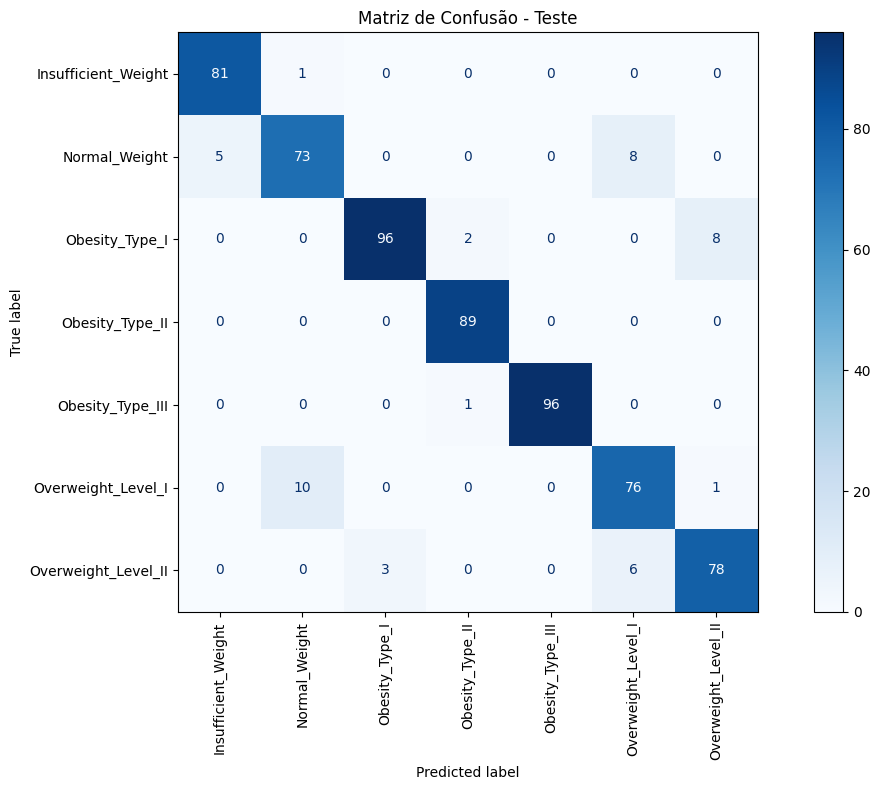

                     precision    recall  f1-score   support

Insufficient_Weight       0.94      0.99      0.96        82
      Normal_Weight       0.87      0.85      0.86        86
     Obesity_Type_I       0.97      0.91      0.94       106
    Obesity_Type_II       0.97      1.00      0.98        89
   Obesity_Type_III       1.00      0.99      0.99        97
 Overweight_Level_I       0.84      0.87      0.86        87
Overweight_Level_II       0.90      0.90      0.90        87

           accuracy                           0.93       634
          macro avg       0.93      0.93      0.93       634
       weighted avg       0.93      0.93      0.93       634



In [11]:
# Predição no teste
y_test_pred = random_search.predict(X_test)

plot_confusion_matrix(y_test, y_test_pred, le, maior = True, title="Matriz de Confusão - Teste")
classification_metrics(y_test, y_test_pred, le)